In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [109]:
df = pd.read_csv('../data/ncbirths.csv')

In [110]:
df.head(100)

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,not married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,not married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,not married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,not married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,not married,27.0,6.38,not low,female,nonsmoker,not white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21.0,19,younger mom,39.0,full term,15.0,not married,38.0,6.88,not low,male,nonsmoker,not white
96,NaN,19,younger mom,38.0,full term,3.0,not married,36.0,6.75,not low,female,smoker,not white
97,19.0,19,younger mom,37.0,full term,0.0,not married,12.0,6.94,not low,male,smoker,white
98,NaN,19,younger mom,39.0,full term,11.0,not married,48.0,8.38,not low,female,smoker,not white


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fage            829 non-null    float64
 1   mage            1000 non-null   int64  
 2   mature          1000 non-null   object 
 3   weeks           998 non-null    float64
 4   premie          998 non-null    object 
 5   visits          991 non-null    float64
 6   marital         999 non-null    object 
 7   gained          973 non-null    float64
 8   weight          1000 non-null   float64
 9   lowbirthweight  1000 non-null   object 
 10  gender          1000 non-null   object 
 11  habit           999 non-null    object 
 12  whitemom        998 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 101.7+ KB


In [112]:
df_nonsmoker = df[df['habit'] == 'nonsmoker']

In [113]:
df_smoker = df[df['habit'] == 'smoker']

In [129]:
df_nonsmoker

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,not married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,not married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,not married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,not married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,not married,27.0,6.38,not low,female,nonsmoker,not white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,47.0,42,mature mom,40.0,full term,10.0,married,26.0,8.44,not low,male,nonsmoker,not white
996,34.0,42,mature mom,38.0,full term,18.0,married,20.0,6.19,not low,female,nonsmoker,white
997,39.0,45,mature mom,40.0,full term,15.0,married,32.0,6.94,not low,female,nonsmoker,white
998,55.0,46,mature mom,31.0,premie,8.0,married,25.0,4.56,low,female,nonsmoker,not white


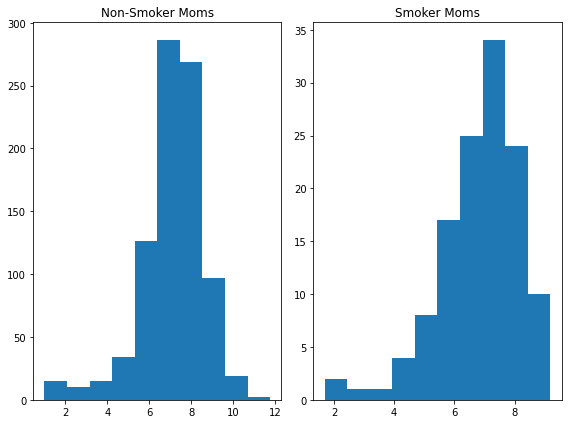

In [114]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

ax1.hist(df_nonsmoker['weight'])
ax1.set_title('Non-Smoker Moms')

ax2.hist(df_smoker['weight'])
ax2.set_title('Smoker Moms')

fig.tight_layout()

In [115]:
df.groupby('habit')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
habit,,,,,,,,
nonsmoker,873.0,7.144273,1.518681,1.00,6.4400,7.31,8.060,11.75
smoker,126.0,6.828730,1.386180,1.69,6.0775,7.06,7.735,9.19


In [116]:
ns_mean = 7.144273
ns_std = 1.518681
ns_count = 873.0

s_mean = 6.828730
s_std = 1.386180
s_count = 126

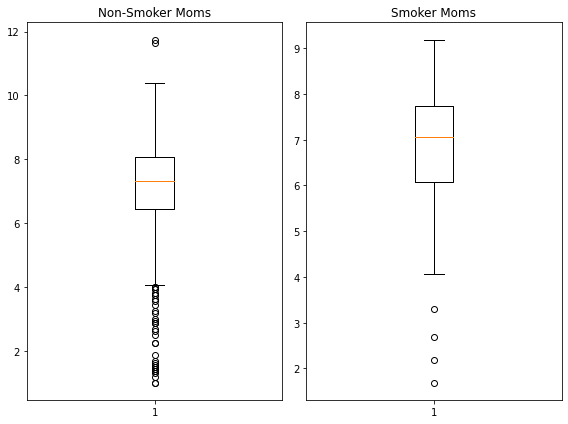

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

ax1.boxplot(df_nonsmoker['weight'])
ax1.set_title('Non-Smoker Moms')

ax2.boxplot(df_smoker['weight'])
ax2.set_title('Smoker Moms')

fig.tight_layout()

In [118]:
# Non-Smokers


# First quartile (Q1)
Q1 = np.percentile(df_nonsmoker['weight'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(df_nonsmoker['weight'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
 
print(IQR)

1.62


In [119]:
# extreme-outliers

# lower-bound
l_b = Q1 - 3 * IQR

# upper-bound
u_b = Q3 + 3 * IQR

print(l_b, u_b)

1.58 12.920000000000002


In [120]:
# Smokers


# First quartile (Q1)
Q1 = np.percentile(df_smoker['weight'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(df_smoker['weight'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
 
print(IQR)

1.6250000000000009


In [121]:
# extreme-outliers

# lower-bound
l_b = Q1 - 3 * IQR

# upper-bound
u_b = Q3 + 3 * IQR

print(l_b, u_b)

1.219999999999997 12.595000000000002


**CONDITIONS FOR THE t-distribution**

1. Independence
2. Normality
    * $n \lt 30$, no clear outliers
    * $n \ge 30$, no extreme outliers 

**Hypothesis**

$H_o = 0, \text{there's no difference in the avg. birth weights for newborns}\\$
$H_A \neq 0, \text{there's difference in the avg. birth weights for newborns}$

In [122]:
# null-hypothesis
h_0 = 0

In [123]:
# difference in mean
x_bar = ns_mean - s_mean
print(x_bar)

0.3155429999999999


**standard error**

$SE = \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}$

In [124]:
# std err
std_err = math.sqrt((ns_std**2)/ns_count + (s_std**2)/s_count)
print(std_err)

0.1337605153577917


**t-statistic**

$t = \frac{\bar{x} - \mu}{SE}$

In [125]:
# t-statistic
t = (x_bar - h_0)/std_err
print(t)

2.359014535462607


**degrees of freedom**

$df = n - 1$

In [126]:
# degree of freedom
dof = ns_count - 1 if ns_count - 1 < s_count - 1 else s_count - 1
print(dof)

125


***p-value***

In [127]:
# p-value
result = stats.t.sf(abs(2.36), df=125)*2
print(result)

0.019823038860634336


***Computationally***

In [128]:
stats.ttest_ind(df_nonsmoker['weight'], df_smoker['weight'])

Ttest_indResult(statistic=2.2033962812961625, pvalue=0.027794878776408287)